<a href="https://colab.research.google.com/github/RedPanda54/Machine_Learning_study/blob/main/ANN_%EC%8B%AC%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns

np.random.seed(10)

URL = "https://raw.githubusercontent.com/RedPanda54/Machine_Learning_study/main/diabetes_prediction_dataset.csv"
df = pd.read_csv(URL)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [2]:
#중복행 제거
df.drop_duplicates(inplace=True)
df # 3854개의 행이 제거되었다.

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
# Label Encoding for gender column
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender']) # Female = 0, Male = 1
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# smoking history을 숫자형 데이터로 전환
smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0, 'unknown': 999}
df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [5]:
df = df[df['age'].mod(1) == 0] # 'age' 열의 값이 정수인 행들만 선택
df # 필터링 되어 94133개의 행만 남았다.

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,-1,24.60,4.8,145,0
99996,0,2.0,0,0,-1,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [6]:
df['age'] = df['age'].astype(int) # age열에는 정수만 남았기 때문에 데이터 타입을 int로 변환

<ipython-input-6-f970472458f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int) # age열에는 정수만 남았기 때문에 데이터 타입을 int로 변환


In [7]:
X = df.iloc[:,:-1].values # 마지막 열을 제외한 모든 열을 선택
y = df.iloc[:,-1].values  # 마지막 열을 선택, 타켓 변수 = diabetes

In [8]:
from sklearn.model_selection import train_test_split # train set과 test set을 나누기 위해 import

# 데이터를 train set과 test set으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# train set에서 validation set을 따로 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
# standardization
from sklearn import preprocessing
stand = preprocessing.StandardScaler()

X_train = stand.fit_transform(X_train) # train set의 독립변수
X_test = stand.transform(X_test) # test set의 독립변수
X_val  = stand.transform(X_val)  # validation의 독립변수

In [10]:
X_train

array([[-0.84060846,  1.47575305, -0.29627002, ...,  0.26223806,
        -0.50124054,  0.03942913],
       [-0.84060846,  0.01311052, -0.29627002, ..., -0.0310244 ,
         0.62259817,  0.03942913],
       [ 1.18798925, -0.35255011, -0.29627002, ..., -0.0833927 ,
        -0.50124054,  0.4777377 ],
       ...,
       [-0.84060846,  0.24164842, -0.29627002, ...,  1.67917458,
         0.52894495, -1.29984706],
       [ 1.18798925,  0.74443179, -0.29627002, ...,  0.22183966,
         3.05758204,  3.93550531],
       [-0.84060846, -0.94674864, -0.29627002, ..., -0.98562366,
        -1.43777279,  1.5004577 ]])

In [11]:
X_test

array([[ 1.18798925,  0.60730905, -0.29627002, ...,  0.37894456,
         0.15433204, -0.93458992],
       [-0.84060846, -0.1697198 , -0.29627002, ..., -0.97814248,
        -0.50124054,  1.5004577 ],
       [-0.84060846,  1.1558    , -0.29627002, ..., -0.0310244 ,
        -0.68854699,  0.03942913],
       ...,
       [ 1.18798925, -0.99245622, -0.29627002, ..., -0.41106862,
        -0.50124054,  0.50208817],
       [-0.84060846, -0.8096259 , -0.29627002, ...,  1.17793516,
         0.43529172, -0.93458992],
       [ 1.18798925, -1.26670169, -0.29627002, ..., -0.91978923,
         0.24798527, -0.20407563]])

In [12]:
X_val

array([[-0.84060846, -0.71821074, -0.29627002, ..., -0.0310244 ,
         0.24798527,  0.50208817],
       [ 1.18798925, -1.58665475, -0.29627002, ..., -1.80705782,
        -0.50124054,  0.50208817],
       [-0.84060846,  1.65858337, -0.29627002, ..., -1.06941294,
        -0.96950667, -0.30147754],
       ...,
       [-0.84060846,  0.01311052, -0.29627002, ...,  1.11210073,
         0.43529172, -0.93458992],
       [-0.84060846,  0.24164842, -0.29627002, ..., -0.31530945,
        -0.96950667, -1.29984706],
       [-0.84060846,  0.0588181 ,  3.37529938, ..., -0.0310244 ,
         0.99721108, -1.17809468]])

In [13]:
import tensorflow as tf
ann = tf.keras.models.Sequential() # Sequential 모델을 생성. 레이어를 순차적으로 쌓아 구성하는 기본적인 신경망 모델
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) # 첫 번째 은닉층을 추가. 뉴런 수는 6개, 'relu'함수를 activation으로 사용.
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) # 두 번째 은닉층을 추가. 뉴런 수는 6개, 'relu'함수를 activation으로 사용.
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid')) # 출력층을 추가. 뉴런 수는 1개, 'sigmoid'함수를 activation으로 사용.

In [41]:
# 컴파일 및 훈련
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size=32, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
1507/1507 [==============================] - 5s 2ms/step - loss: 0.1193 - accuracy: 0.9581 - val_loss: 0.1171 - val_accuracy: 0.9581
Epoch 2/30
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1192 - accuracy: 0.9586 - val_loss: 0.1169 - val_accuracy: 0.9585
Epoch 3/30
1507/1507 [==============================] - 6s 4ms/step - loss: 0.1191 - accuracy: 0.9586 - val_loss: 0.1168 - val_accuracy: 0.9583
Epoch 4/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1191 - accuracy: 0.9584 - val_loss: 0.1169 - val_accuracy: 0.9589
Epoch 5/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1190 - accuracy: 0.9585 - val_loss: 0.1169 - val_accuracy: 0.9574
Epoch 6/30
1507/1507 [==============================] - 7s 5ms/step - loss: 0.1190 - accuracy: 0.9579 - val_loss: 0.1171 - val_accuracy: 0.9589
Epoch 7/30
1507/1507 [==============================] - 5s 3ms/step - loss: 0.1189 - accuracy: 0.9584 - val_loss: 0.1167 - val_accuracy:

In [42]:
# 기본 신경망 정확도
ann.evaluate(X_test, y_test)

589/589 [==============================] - 1s 1ms/step - loss: 0.1134 - accuracy: 0.9596


[0.11339639872312546, 0.9596324563026428]

**He initialization**

In [43]:
# He initialization
# 뉴런의 개수나 Epoch, 함수 종류도 똑같이 맞췄다.
H_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer='he_normal')
])

# 컴파일 및 훈련
H_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
H_model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data = (X_val, y_val))


Epoch 1/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.2227 - accuracy: 0.9300 - val_loss: 0.1381 - val_accuracy: 0.9482
Epoch 2/30
1507/1507 [==============================] - 5s 3ms/step - loss: 0.1317 - accuracy: 0.9526 - val_loss: 0.1246 - val_accuracy: 0.9553
Epoch 3/30
1507/1507 [==============================] - 5s 3ms/step - loss: 0.1241 - accuracy: 0.9571 - val_loss: 0.1197 - val_accuracy: 0.9578
Epoch 4/30
1507/1507 [==============================] - 7s 5ms/step - loss: 0.1212 - accuracy: 0.9579 - val_loss: 0.1176 - val_accuracy: 0.9589
Epoch 5/30
1507/1507 [==============================] - 5s 3ms/step - loss: 0.1197 - accuracy: 0.9580 - val_loss: 0.1163 - val_accuracy: 0.9588
Epoch 6/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.1187 - accuracy: 0.9586 - val_loss: 0.1155 - val_accuracy: 0.9586
Epoch 7/30
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1174 - accuracy: 0.9588 - val_loss: 0.1147 - val_accuracy:

In [44]:
# H_model의 정확도
H_model.evaluate(X_test, y_test)

589/589 [==============================] - 1s 1ms/step - loss: 0.0864 - accuracy: 0.9694


[0.08635757863521576, 0.9693525433540344]

**Xavier initialization**

In [45]:
# Xavier initialization
# 마찬가지로 parameter값을 맞췄다.
X_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform')
])

# 컴파일 및 훈련
X_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
X_model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data = (X_val, y_val))

Epoch 1/30
1507/1507 [==============================] - 5s 3ms/step - loss: 0.2374 - accuracy: 0.9066 - val_loss: 0.1641 - val_accuracy: 0.9100
Epoch 2/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1514 - accuracy: 0.9411 - val_loss: 0.1408 - val_accuracy: 0.9557
Epoch 3/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1381 - accuracy: 0.9563 - val_loss: 0.1315 - val_accuracy: 0.9577
Epoch 4/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1313 - accuracy: 0.9576 - val_loss: 0.1269 - val_accuracy: 0.9574
Epoch 5/30
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1274 - accuracy: 0.9581 - val_loss: 0.1241 - val_accuracy: 0.9580
Epoch 6/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1252 - accuracy: 0.9578 - val_loss: 0.1227 - val_accuracy: 0.9573
Epoch 7/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1237 - accuracy: 0.9585 - val_loss: 0.1212 - val_accuracy:

In [46]:
# X_model의 정확도
X_model.evaluate(X_test, y_test)

589/589 [==============================] - 1s 1ms/step - loss: 0.1165 - accuracy: 0.9595


[0.1164611354470253, 0.9594730734825134]

**Batch normalization**

In [39]:
#Batch normalization
B_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# 컴파일 및 훈련
B_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
B_model.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
1507/1507 [==============================] - 6s 3ms/step - loss: 0.2720 - accuracy: 0.9030
Epoch 2/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1421 - accuracy: 0.9480
Epoch 3/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1380 - accuracy: 0.9497
Epoch 4/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1353 - accuracy: 0.9504
Epoch 5/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.1304 - accuracy: 0.9528
Epoch 6/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1260 - accuracy: 0.9556
Epoch 7/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1229 - accuracy: 0.9562
Epoch 8/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.1221 - accuracy: 0.9568
Epoch 9/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1186 - accuracy: 0.9582
Epoch 10/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.116

In [40]:
# B_model의 정확도
B_model.evaluate(X_test, y_test)

589/589 [==============================] - 1s 1ms/step - loss: 0.0959 - accuracy: 0.9655


[0.09593004733324051, 0.9655282497406006]

**L1 regularity**

In [56]:
# L1 regularity
# L2 regularity를 사용하고 싶으면 regularizers.l2로 바꾸면 된다.
L1_model = tf.keras.models.Sequential()
L1_model.add(tf.keras.layers.Dense(units = 6, kernel_regularizer=tf.keras.regularizers.l1(0.01), activation = 'relu'))
L1_model.add(tf.keras.layers.Dense(units = 6, kernel_regularizer=tf.keras.regularizers.l1(0.01), activation = 'relu'))
L1_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# 컴파일 및 훈련
L1_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = L1_model.fit(X_train, y_train, batch_size=32, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
1507/1507 [==============================] - 5s 2ms/step - loss: 0.3628 - accuracy: 0.9076 - val_loss: 0.2249 - val_accuracy: 0.9100
Epoch 2/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.2027 - accuracy: 0.9464 - val_loss: 0.1867 - val_accuracy: 0.9551
Epoch 3/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1813 - accuracy: 0.9554 - val_loss: 0.1733 - val_accuracy: 0.9578
Epoch 4/30
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1717 - accuracy: 0.9563 - val_loss: 0.1671 - val_accuracy: 0.9576
Epoch 5/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1669 - accuracy: 0.9572 - val_loss: 0.1631 - val_accuracy: 0.9575
Epoch 6/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1637 - accuracy: 0.9573 - val_loss: 0.1604 - val_accuracy: 0.9570
Epoch 7/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1614 - accuracy: 0.9572 - val_loss: 0.1583 - val_accuracy:

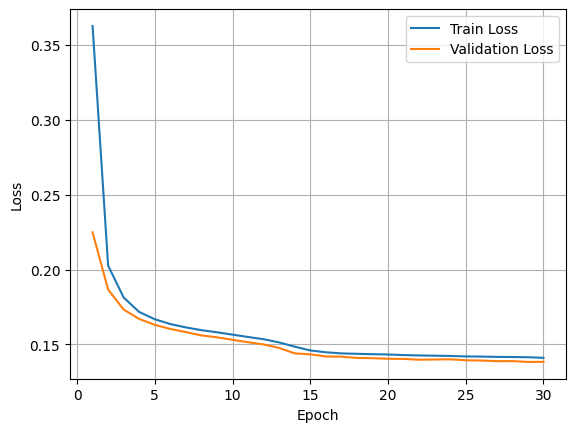

In [57]:
# 훈련 세트와 검증 세트의 손실 값 저장
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# epoch에 따른 손실 값 그래프
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [58]:
# L1_model의 정확도
L1_model.evaluate(X_test, y_test)

589/589 [==============================] - 1s 2ms/step - loss: 0.1373 - accuracy: 0.9584


[0.13732624053955078, 0.9584107995033264]

**Drop out**

In [60]:
# Drop out
# 초기화는 He initialization을 사용.
D_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer='he_normal')
])

# 컴파일 및 훈련
D_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = D_model.fit(X_train, y_train, batch_size=32, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
1507/1507 [==============================] - 4s 2ms/step - loss: 0.3015 - accuracy: 0.9106 - val_loss: 0.1484 - val_accuracy: 0.9470
Epoch 2/30
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1721 - accuracy: 0.9374 - val_loss: 0.1315 - val_accuracy: 0.9548
Epoch 3/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1565 - accuracy: 0.9396 - val_loss: 0.1260 - val_accuracy: 0.9567
Epoch 4/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1480 - accuracy: 0.9413 - val_loss: 0.1230 - val_accuracy: 0.9571
Epoch 5/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1456 - accuracy: 0.9402 - val_loss: 0.1196 - val_accuracy: 0.9576
Epoch 6/30
1507/1507 [==============================] - 4s 3ms/step - loss: 0.1425 - accuracy: 0.9418 - val_loss: 0.1178 - val_accuracy: 0.9581
Epoch 7/30
1507/1507 [==============================] - 3s 2ms/step - loss: 0.1425 - accuracy: 0.9408 - val_loss: 0.1175 - val_accuracy:

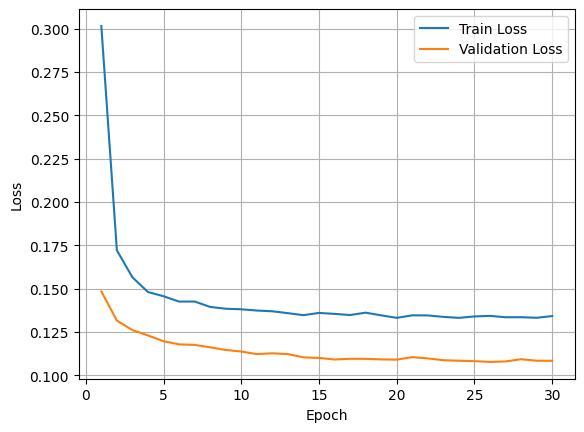

In [61]:
# 훈련 세트와 검증 세트의 손실 값 저장
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# epoch에 따른 손실 값 그래프
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
# D_model의 정확도
D_model.evaluate(X_test, y_test)

589/589 [==============================] - 1s 1ms/step - loss: 0.1070 - accuracy: 0.9595


[0.10701631754636765, 0.9594730734825134]

**일부러 성능 저하시키기**

In [65]:
any_model = tf.keras.models.Sequential()
any_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
any_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
any_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# 컴파일 및 훈련
any_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
any_model.fit(X_train, y_train, batch_size=32, epochs = 1, validation_data = (X_val, y_val))

1507/1507 [==============================] - 4s 2ms/step - loss: 0.3254 - accuracy: 0.9108 - val_loss: 0.1983 - val_accuracy: 0.9100


In [77]:
# 입력 데이터에 잡음 추가
noise_factor = 5
noisy_X_train = X_train + noise_factor * np.random.randn(*X_train.shape)
noisy_X_val = X_val + noise_factor * np.random.randn(*X_val.shape)

any_model = tf.keras.models.Sequential()
any_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
any_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
any_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# 모델 컴파일
any.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 잡음이 추가된 데이터로 모델 학습
history = any.fit(noisy_X_train, y_train, batch_size=32, epochs=10, validation_data=(noisy_X_val, y_val))


Epoch 1/10
1507/1507 [==============================] - 79s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9108 - val_loss: 0.0000e+00 - val_accuracy: 0.9100
Epoch 2/10
1507/1507 [==============================] - 4s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9108 - val_loss: 0.0000e+00 - val_accuracy: 0.9100
Epoch 3/10
1507/1507 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9108 - val_loss: 0.0000e+00 - val_accuracy: 0.9100
Epoch 4/10
1507/1507 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9108 - val_loss: 0.0000e+00 - val_accuracy: 0.9100
Epoch 5/10
1507/1507 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9108 - val_loss: 0.0000e+00 - val_accuracy: 0.9100
Epoch 6/10
1507/1507 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9108 - val_loss: 0.0000e+00 - val_accuracy: 0.9100
Epoch 7/10
1507/1507 [==============================] - 3s 2ms/step - loss: 0.0000e+00 

In [73]:
any.evaluate(X_test, y_test)

589/589 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9070


[0.0, 0.9070484042167664]